<a href="https://colab.research.google.com/github/jlit94/AI/blob/main/HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Author: AJ Litchfield

# For this assignment, we are examining genetic algorithms and how we can achieve optimization of a load bearing I-beam through multi-objective engineering design. Genetic algorithms allow us to find the convergence point–or optimization–of a population of solutions to a function, this behavior will be especially useful in solving a problem such as the I-beam scenario because we have multiple objectives which are competing against one another.


## We have two functions in this scenario that need to be optimized. F1 is the cross section area of the beam and F2 is the static deflection. The conflicting nature of these functions comes into play as we see that optimizing one, which in this case is minimizing the result of the function, causes the other to increase. A beam strong enough to have a lower static deflection needs to be stronger and heavier, which requires a larger cross section.

# How can we find a balance between the two that will give us a fully optimized beam that minimizes both cross section and static deflection? That is where our genetic algorithms will come in.

# First we set up the R program so we can run this optimization.

In [1]:
# genetic algorithms
install.packages('GA')

# statistical graphics
install.packages('ggplot2')

# used to create plots and charts, including line charts
# scatter plots, bar charts , histograms, etc.
install.packages('plotly')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘foreach’, ‘iterators’, ‘Rcpp’, ‘RcppArmadillo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘later’, ‘htmlwidgets’, ‘lazyeval’, ‘crosstalk’, ‘promises’




In [2]:
# Loading the needed libraries

library(GA)
library(plotly)

Loading required package: foreach

Loading required package: iterators

Package 'GA' version 3.2.4
Type 'citation("GA")' for citing this R package in publications.


Attaching package: ‘GA’


The following object is masked from ‘package:utils’:

    de


Loading required package: ggplot2


Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout




# Next, we will tackle our first function. This function defines the cross section of the I-beam.

── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  50 
Number of generations =  100 
Elitism               =  2 
Crossover probability =  0.75 
Mutation probability  =  0.001 
Search domain = 
      x1 x2  x3  x4
lower 10 10 0.9 0.9
upper 80 50 5.0 5.0

GA results: 
Iterations             = 100 
Fitness function value = -64.99598 
Solution = 
           x1       x2       x3        x4
[1,] 21.74959 17.46061 1.540834 0.9888167

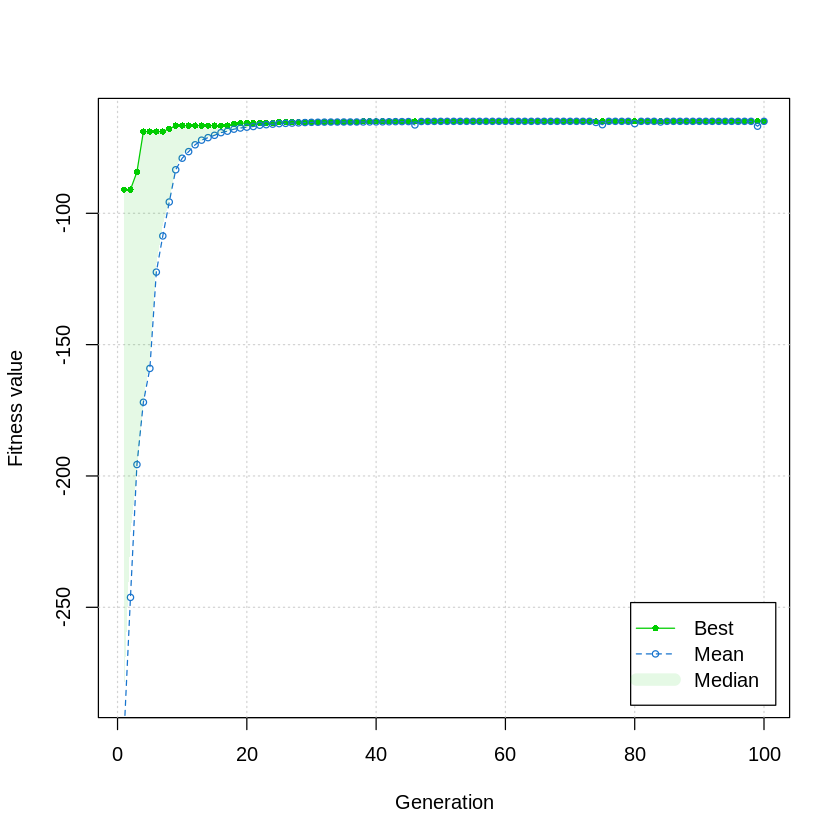

In [3]:
#  Define the I-beam cross section function to be optimized
Func1 = function(x1, x2, x3, x4)
{
  (2 * x2 * x4) + (x3 * (x1 - (2 * x4)))
}

# Set lower & upper bound; step size determines precision
x1 = seq(10, 80, by = 0.1)
x2 = seq(10, 50, by = 0.1)
x3 = seq(0.9, 5.0, by = 0.1)
x4 = seq(0.9, 5.0, by = 0.1)

# Applied Genetic Algorithm, we multiply the function by -1 to minimize
GA1 = ga(type = "real-valued",
        fitness = function(x) -Func1(x[1], x[2], x[3], x[4]),
        lower = c(10, 10, 0.9, 0.9), upper = c(80, 50, 5.0, 5.0),
        popSize = 50, pcrossover = .75, pmutation = 0.001,
        maxiter = 100, run = 100)

summary(GA1)

plot(GA1)

# We can see in the above graph that this function approaches optimality rather quickly. By the time 20 generations have been generated, the algorithm has reached close to the optimium value and then makes marginal improvement leading up to the 100 generation limit. We also see that the optimum value for the area of the cross section comes out to be 47.122. When we look at the optimum values for each x value, we see that each variable is right up against the lower bound for that given section of the beam. This makes sense, this function is just finding the minimized possible size of the cross section of the beam without being constrained by static deflection.

# Let's see what the optimization for the static deflection looks like so we can ultimately optimize the two against one another.

── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  50 
Number of generations =  100 
Elitism               =  2 
Crossover probability =  0.75 
Mutation probability  =  0.001 
Search domain = 
      x1 x2  x3  x4
lower 10 10 0.9 0.9
upper 80 50 5.0 5.0

GA results: 
Iterations             = 100 
Fitness function value = -0.007793135 
Solution = 
           x1       x2       x3       x4
[1,] 79.03225 42.64932 4.770665 4.130485

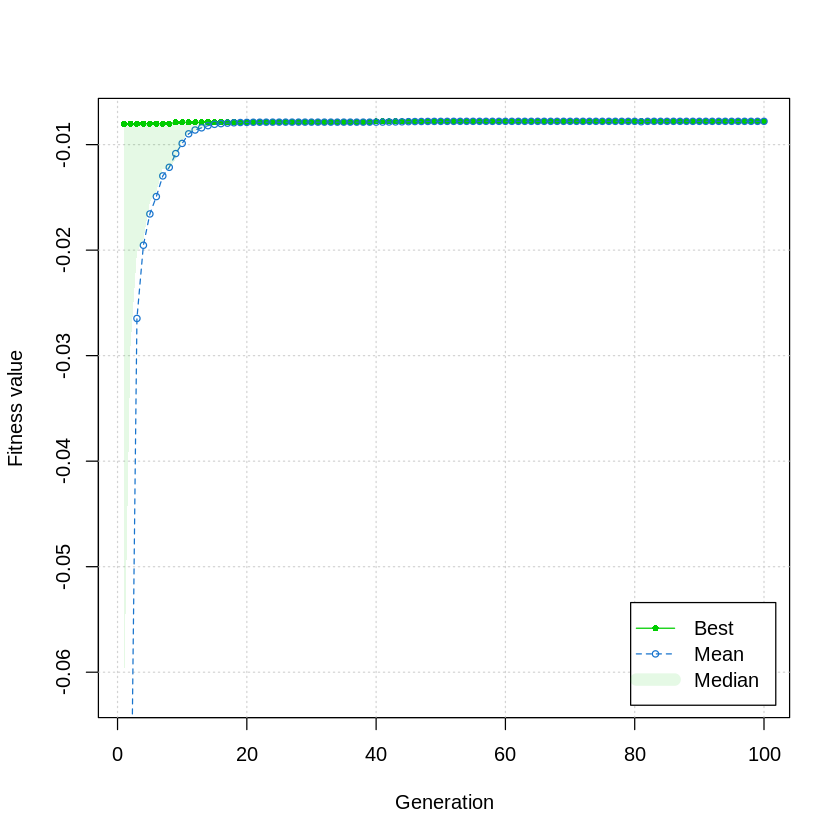

In [4]:
#  Define the static deflection function to be optimized
Func2 = function(x1, x2, x3, x4)
{
  60000 / ((x3 * (x1 - (2 * x4))^3)
  + ((2 * x2 * x4) * (((4 * x4)^2) + ((3 * x1) * (x1 - (2 * x4))))))
}

# Set lower & upper bound; step size determines precision
x1 = seq(10, 80, by = 0.1)
x2 = seq(10, 50, by = 0.1)
x3 = seq(0.9, 5.0, by = 0.1)
x4 = seq(0.9, 5.0, by = 0.1)

# Applied Genetic Algorithm, we multiply the function by -1 to minimize
GA2 = ga(type = "real-valued",
        fitness = function(x) -Func2(x[1], x[2], x[3], x[4]),
        lower = c(10, 10, 0.9, 0.9), upper = c(80, 50, 5.0, 5.0),
        popSize = 50, pcrossover = .75, pmutation = 0.001,
        maxiter = 100, run = 100, keepBest = TRUE)

summary(GA2)



plot(GA2)

# Again, given what we know about genetic algorithms and the constraints of this scenario, the results here hold up. We see that static deflection is being minimized to a value of 0.00692. If we look at the values for the x variables, we see our understanding of this problem confirmed yet again. The optimum values of x1, x2, x3 and x4 are all at or near the upperbound. This makes sense for static deflection because those values correspond to area of the cross section. In order to have the least static deflection possible you need the strongest beam, which means the biggest beam.

# Now that we know our two functions for the cross section and the static deflection are working correctly, we can combine them using the weighted approach where the two objective functions are converted into a single one using the equation: F = a*f1 + b*f2.

In [5]:
#  Define the weighted function to be optimized
Func = function(Func1, Func2)
{
  (.5 * Func1) + (0.5 * Func2)
}

# Set lower & upper bound; step size determines precision
x1 = seq(10, 80, by = 0.1)
x2 = seq(10, 50, by = 0.1)
x3 = seq(0.9, 5.0, by = 0.1)
x4 = seq(0.9, 5.0, by = 0.1)


# Applied Genetic Algorithm
GA = ga(type = "real-valued",
        fitness = function(x) -Func(Func1, Func2),
        lower = c(10, 10, 0.9, 0.9), upper = c(80, 50, 5.0, 5.0),
        popSize = 50, pcrossover = .75, pmutation = 0.001,
        maxiter = 100, run = 100, keepBest = TRUE)

summary(GA)

plot(GA)

ERROR: Error in 0.5 * Func1: non-numeric argument to binary operator
